# 1. Carga de los datos

In [272]:
#Ejecutar en terminal: pip install -r requirements.txt

import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Set the path to the file you'd like to load
file_path = "./Student_Performance.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "nikhil7280/student-performance-multiple-linear-regression",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

First 5 records:    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


## Cargar el dataset en Dataframe

In [273]:
# Cargar el dataset en un DataFrame
import pandas as pd

df = pd.read_csv("Student_Performance.csv")

# Explorar la estructura del dataset
print("Forma del DataFrame (filas, columnas):", df.shape)
print("\nTipos de datos de cada columna:")
print(df.dtypes)
print("\nPrimeras 10 filas del DataFrame:")
print(df.head(10))
print("\n================================= Información del DataFrame (memoria, tipos de datos) ==============================")
df.info()

# Estadísticas descriptivas
print("\n================================= Estadísticas Descriptivas (media, std, min, max) ==============================")
print(df.describe())

Forma del DataFrame (filas, columnas): (10000, 6)

Tipos de datos de cada columna:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Primeras 10 filas del DataFrame:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   
5              3               78                         No            9   
6              7               73                        Yes      

# Análisis de características

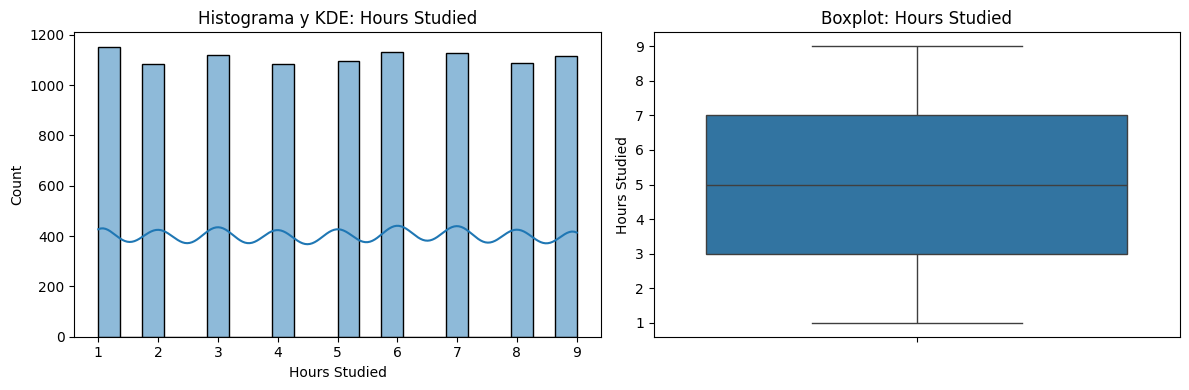

Estadísticos de Hours Studied:
count    10000.000000
mean         4.992900
std          2.589309
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Hours Studied, dtype: float64
Asimetría: -0.004, Curtosis: -1.232



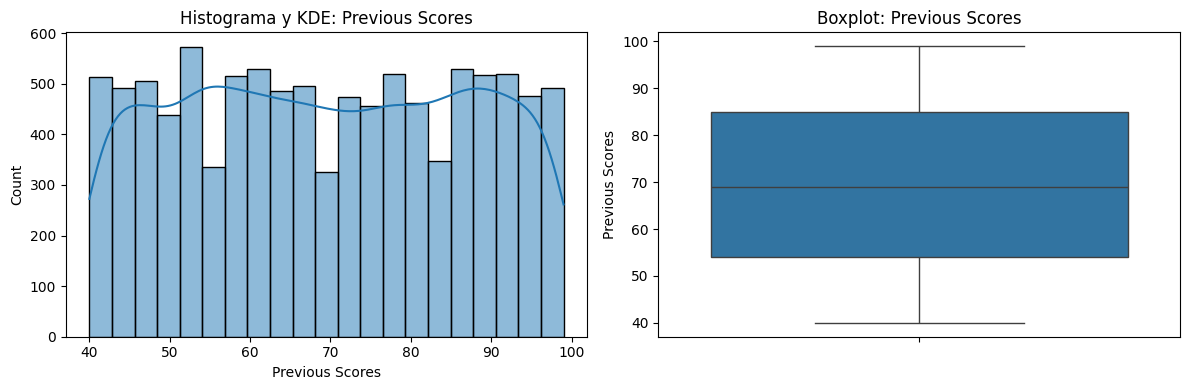

Estadísticos de Previous Scores:
count    10000.000000
mean        69.445700
std         17.343152
min         40.000000
25%         54.000000
50%         69.000000
75%         85.000000
max         99.000000
Name: Previous Scores, dtype: float64
Asimetría: 0.005, Curtosis: -1.213



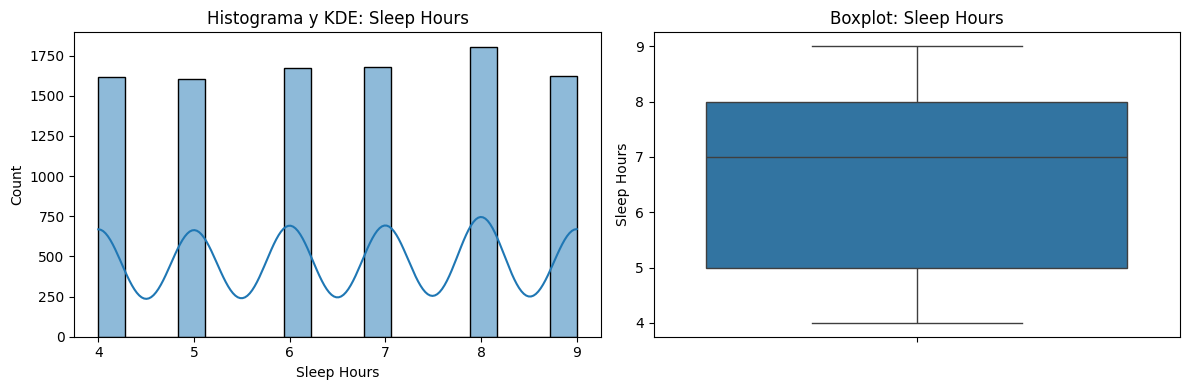

Estadísticos de Sleep Hours:
count    10000.000000
mean         6.530600
std          1.695863
min          4.000000
25%          5.000000
50%          7.000000
75%          8.000000
max          9.000000
Name: Sleep Hours, dtype: float64
Asimetría: -0.039, Curtosis: -1.257



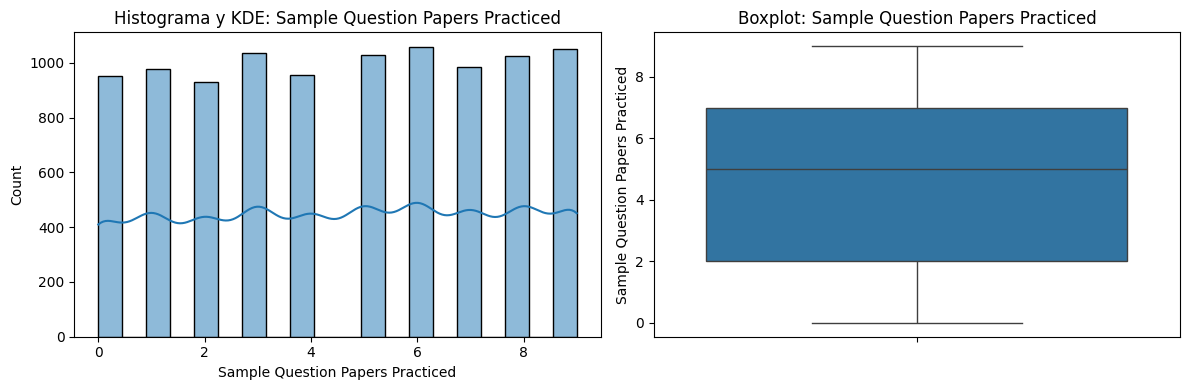

Estadísticos de Sample Question Papers Practiced:
count    10000.000000
mean         4.583300
std          2.867348
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Sample Question Papers Practiced, dtype: float64
Asimetría: -0.036, Curtosis: -1.215



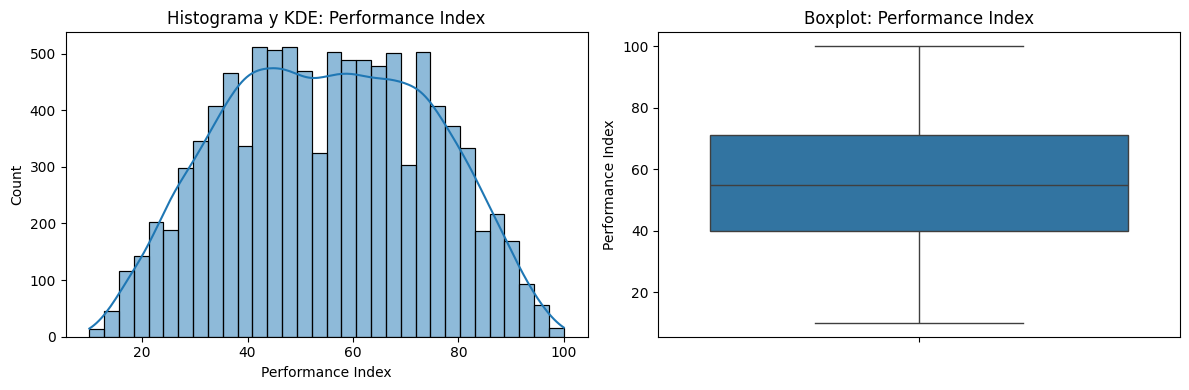

Estadísticos de Performance Index:
count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64
Asimetría: -0.002, Curtosis: -0.861



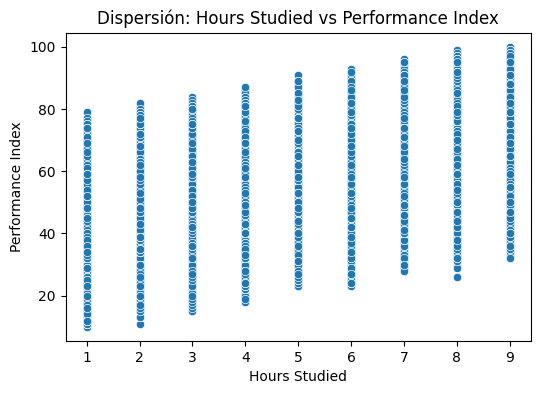

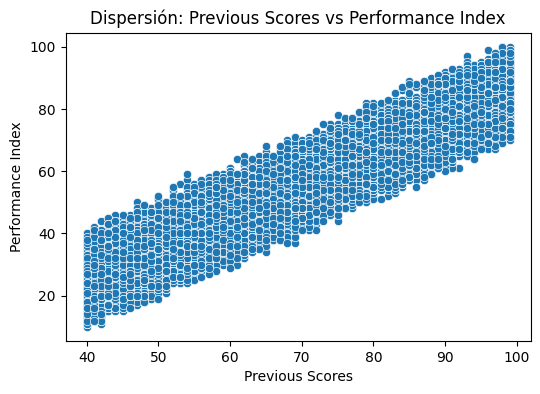

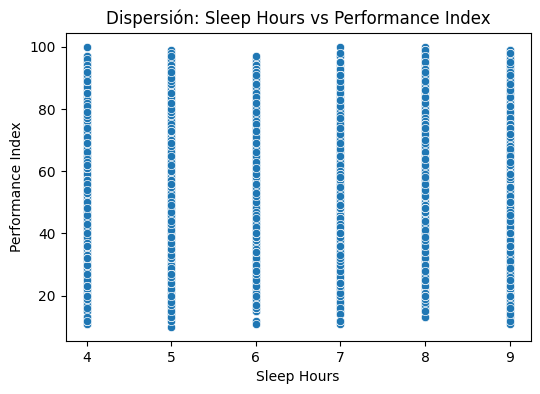

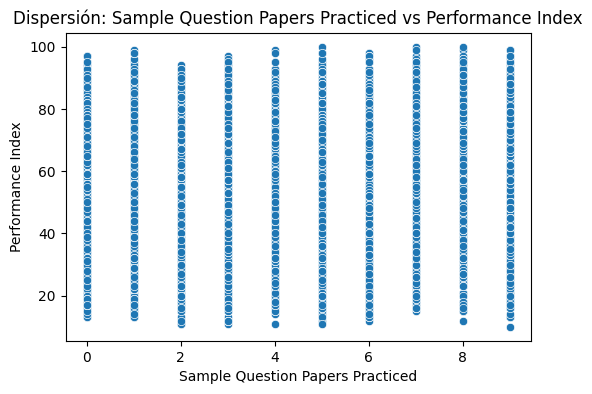

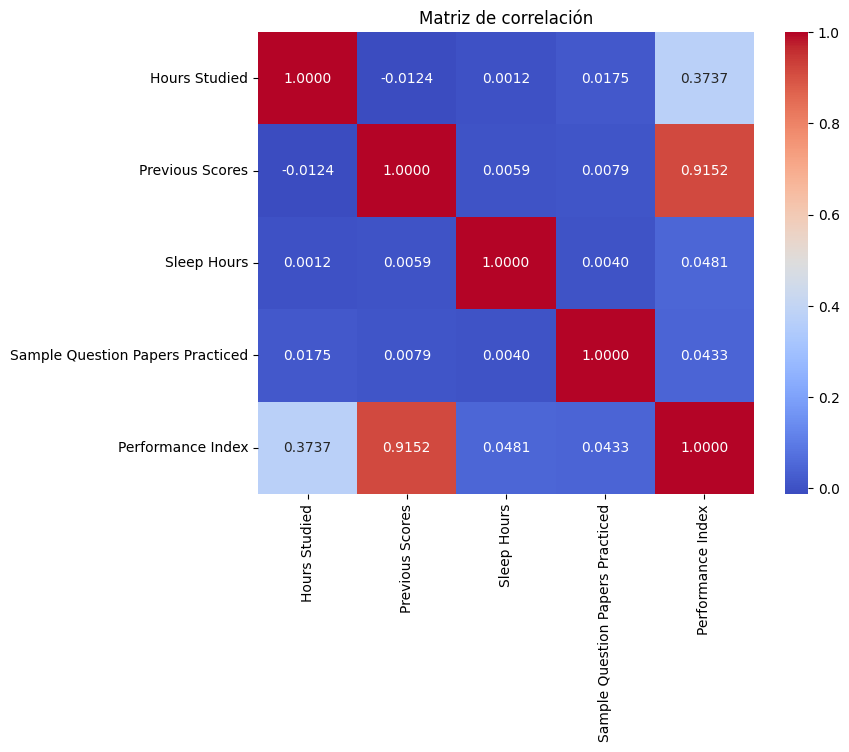

=== Detección de outliers (criterio 1.5*IQR) ===
Hours Studied: 0 outliers
Previous Scores: 0 outliers
Sleep Hours: 0 outliers
Sample Question Papers Practiced: 0 outliers
Performance Index: 0 outliers

=== Interpretación y tratamiento de outliers ===
- Hours Studied: No se detectaron valores atípicos significativos.
- Previous Scores: No se detectaron valores atípicos significativos.
- Sleep Hours: No se detectaron valores atípicos significativos.
- Sample Question Papers Practiced: No se detectaron valores atípicos significativos.
- Performance Index: No se detectaron valores atípicos significativos.


In [274]:
# --- Análisis exploratorio de datos (EDA) ---

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Histogramas y boxplots de variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_title(f"Histograma y KDE: {col}")
    sns.boxplot(y=df[col], ax=axs[1])
    axs[1].set_title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()
    print(f"Estadísticos de {col}:")
    print(df[col].describe())
    print(f"Asimetría: {df[col].skew():.3f}, Curtosis: {df[col].kurtosis():.3f}\n")

# 2. Diagramas de dispersión entre características numéricas y el target
target = 'Performance Index'
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"Dispersión: {col} vs {target}")
        plt.show()

# 3. Matriz de correlación y mapa de calor
corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Matriz de correlación")
plt.show()

# 4. Identificación de outliers usando el criterio de rango intercuartílico (IQR)
print("=== Detección de outliers (criterio 1.5*IQR) ===")
outlier_report = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    n_outliers = outliers.shape[0]
    outlier_report[col] = n_outliers
    print(f"{col}: {n_outliers} outliers")

# 5. Interpretación y tratamiento de outliers
print("\n=== Interpretación y tratamiento de outliers ===")
for col, n_outliers in outlier_report.items():
    if n_outliers > 0:
        print(f"- {col}: Se detectaron {n_outliers} valores atípicos. Se recomienda revisar si son errores de captura o valores extremos válidos. Si afectan el análisis, considerar su tratamiento (eliminación o imputación).")
    else:
        print(f"- {col}: No se detectaron valores atípicos significativos.")


### Eliminacion de Datos repetidos

¿Porque eliminar los datos?
La existencia de estos puede llevar a un sobre entrenamiento (overfitting) lo cual provocaría que el modelo se sobre adecúe a esos datos y pierda su capacidad de generalizar, esto con datasets muy grandes no ocurre, siempre y cuando la cantidad de datos repetidos sea muy baja en relación al tamaño del dataset, sin embargo es buena practica eliminarlos, debido a esto, se eliminan los repetidos.



In [275]:
print("Duplicados totales:", df.duplicated().sum())  #Obtenemos el total de datos repetidos
print(df[df.duplicated()])  #Mostramos los datos repetidos

df = df.drop_duplicates()  #Eliminamos los datos repetidos  
print("Duplicados totales:", df.duplicated().sum())  #Verificamos que ya no hay datos repetidos

Duplicados totales: 127
      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
915               9               52                         No            5   
1477              7               61                        Yes            6   
1601              5               99                         No            7   
1786              2               62                        Yes            9   
2026              5               87                        Yes            6   
...             ...              ...                        ...          ...   
9644              4               91                        Yes            4   
9940              8               95                         No            5   
9954              6               97                         No            8   
9966              1               41                         No            7   
9985              8               99                         No            5   

      Sample Qu

## Normalización de los datos
---

##### ¿Porque normalizar los datos?

El motivo de realizar la normalización de los datos es establecerlos todos en una escala similar, esto debido a que en el dataset como se puede apreciar se toman datos muy diferenciados en sus escalas, por ejemplo "previous scores" las cuales llegan hasta el 99, comparandolo con por ejemplo sleep hours, queda muy separada la escala, lo cual va a generar que al realizar los calculos del descenso del gradiente, le asigne mayor peso al feature con mayor tamaño, haciendolo más relevante en la regresión, cuando puede no serlo. 

In [276]:
# Copiar dataframe para no modificar el original
df_norm = df.copy()

# Convertir columna categórica a numérica (Yes=1, No=0)
df_norm["Extracurricular Activities"] = df_norm["Extracurricular Activities"].map({"Yes": 1, "No": 0})

# Se escogen las columnas a normalizar (todas menos PerformanceIndex y la categórica)
cols_to_normalize = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]

# Normalizar con Z-score
for col in cols_to_normalize:
    mean = df_norm[col].mean()
    std = df_norm[col].std()
    df_norm[col] = (df_norm[col] - mean) / std

# Mostrar primeras filas normalizadas

print("---Columnas sin normalizar---\n" , df.head(),"\n\n---Columnas normalizadas---\n" , df_norm.head())

---Columnas sin normalizar---
    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0   

---Columnas normalizadas---
    Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0       0.775526         1.706082                      

# Division del Dataset

In [277]:
import numpy as np
import pandas as pd

# 1) Muestreo aleatorio (Random Sampling)
np.random.seed(50)  # Para reproducibilidad
indices = np.random.permutation(len(df_norm))
n_total = len(df_norm)
n_train = int(0.7 * n_total)
n_val = int(0.15 * n_total)
n_test = int(0.15 * n_total)

train_idx = indices[:n_train]
val_idx = indices[n_train:n_train + n_val]
test_idx = indices[n_train + n_val:]

df_train_random = df_norm.iloc[train_idx].reset_index(drop=True)
df_val_random = df_norm.iloc[val_idx].reset_index(drop=True)
df_test_random = df_norm.iloc[test_idx].reset_index(drop=True)







print("Random Sampling:")
print(f"Entrenamiento: {df_train_random.shape}, Validación: {df_val_random.shape}, Prueba: {df_test_random.shape}")

# 2) Muestreo estratificado (Stratified Sampling) usando la variable categórica
# Usaremos 'Extracurricular Activities' como variable de estratificación
strat_col = 'Extracurricular Activities'
df_strat = df_norm.copy()
df_train_strat = pd.DataFrame()
df_val_strat = pd.DataFrame()
df_test_strat = pd.DataFrame()

for group, group_df in df_strat.groupby(strat_col):
    idx = np.random.permutation(len(group_df))
    n = len(group_df)
    n_train = int(0.7 * n)
    n_val = int(0.15 * n)
    n_test = int(0.15 * n)

    train_idx = idx[:n_train]
    val_idx = idx[n_train:n_train + n_val]
    test_idx = idx[n_train + n_val:]

    df_train_strat = pd.concat([df_train_strat, group_df.iloc[train_idx]], axis=0)
    df_val_strat = pd.concat([df_val_strat, group_df.iloc[val_idx]], axis=0)
    df_test_strat = pd.concat([df_test_strat, group_df.iloc[test_idx]], axis=0)

df_train_strat = df_train_strat.sample(frac=1, random_state=50).reset_index(drop=True)
df_val_strat = df_val_strat.sample(frac=1, random_state=50).reset_index(drop=True)
df_test_strat = df_test_strat.sample(frac=1, random_state=50).reset_index(drop=True)

print("\nStratified Sampling (por Extracurricular Activities):")
print(f"Entrenamiento: {df_train_strat.shape}, Validación: {df_val_strat.shape}, Prueba: {df_test_strat.shape}")

Random Sampling:
Entrenamiento: (6911, 6), Validación: (1480, 6), Prueba: (1482, 6)

Stratified Sampling (por Extracurricular Activities):
Entrenamiento: (6910, 6), Validación: (1480, 6), Prueba: (1483, 6)



### Inicio Regresión
---

Una vez Divididos en las formas de sampling, se procede a iniciar con la regresión lineal del descenso del gradiente, con esto se busca pulir los valores w y b de la función para aproximarlo a uno de los minimos de la función

Se empezará con el modelo random de sampling

## Se sacan los valores de X, Y

Se sacan los valores respectivos para cada conjunto, xs y ys para Training, validation y testing 

In [278]:
target_col = "Performance Index"
feature_cols = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced",
    "Extracurricular Activities"  #Esta se convirtió a 0s y 1s
]

# ---- construir X,y (train/val/test)
X_train = df_train_random[feature_cols].to_numpy(dtype=float)
y_train_label = df_train_random[target_col].to_numpy(dtype=float)

X_val   = df_val_random[feature_cols].to_numpy(dtype=float)
y_val_label   = df_val_random[target_col].to_numpy(dtype=float)

X_test  = df_test_random[feature_cols].to_numpy(dtype=float)
y_test_label  = df_test_random[target_col].to_numpy(dtype=float)

In [279]:

def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def batch_gradient_descent(X, Y, learning_rate=0.01, epochs=1000,X_val=None, y_val=None):
    m, n = X.shape
    w = np.zeros(n, dtype=float)
    b = 0.0

    train_mse_graph, val_mse_graph = [], []

    for epoch in range(epochs):

        y_pred= X.dot(w) + b
        error = y_pred - Y

        # gradientes
        dw = (2 /m) * X.T.dot(error) #Transpusta x debido a que 
        db = (2 /m) * np.sum(error)

        # Actualización de w y b, para 
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # métricas por época
        train_mse = MSE(Y, y_pred)
        train_mse_graph.append(train_mse) #Historial del Mean squared error del train para poder graficarlo después

        if X_val is not None and y_val is not None: #Si se proporcionan datos de validación, se calcula el MSE de validación
            val_mse = MSE(y_val, X_val.dot(w) + b)
            val_mse_graph.append(val_mse) #Historial del Mean squared error del validación para poder graficarlo después
        
        # print cada 100 épocas
        if epoch % 100 == 0:
            if X_val is not None and y_val is not None:
                print(f"Epoch {epoch}: Train MSE={train_mse:.6f} | Val MSE={val_mse:.6f}")
            else:
                print(f"Epoch {epoch}: Train MSE={train_mse:.6f}")

    return w, b, train_mse_graph, val_mse_graph


##### Se ejecuta la ejecución de 1000 epochs, mediante batch gradient descent

Epoch 0: Train MSE=3414.900014 | Val MSE=3324.646940
Epoch 100: Train MSE=96.129193 | Val MSE=92.817603
Epoch 200: Train MSE=37.108673 | Val MSE=35.998278
Epoch 300: Train MSE=19.361264 | Val MSE=18.778249
Epoch 400: Train MSE=11.225591 | Val MSE=10.891765
Epoch 500: Train MSE=7.457983 | Val MSE=7.255884
Epoch 600: Train MSE=5.712722 | Val MSE=5.583209
Epoch 700: Train MSE=4.904260 | Val MSE=4.816250
Epoch 800: Train MSE=4.529755 | Val MSE=4.466331
Epoch 900: Train MSE=4.356271 | Val MSE=4.307885


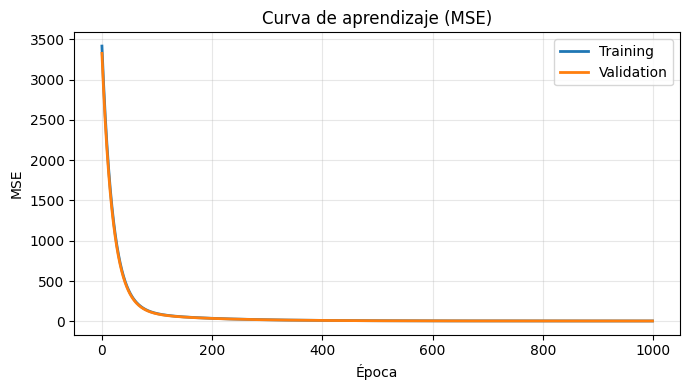


--- Evaluación Final del Modelo ---

MSE Train: 4.2759083600362775
MSE Val: 4.2374320047553065
MSE Test: 4.0964389637495415


In [280]:
w, b, train_graph, val_graph = batch_gradient_descent(
    X_train, y_train_label,
    learning_rate=0.01, epochs=1000,X_val=X_val, y_val=y_val_label
    
)

plt.figure(figsize=(7,4))
plt.plot(train_graph, label="Training", linewidth=2)
plt.plot(val_graph,   label="Validation", linewidth=2)
plt.xlabel("Época")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje (MSE)")
plt.legend()
plt.grid(alpha=.3)
plt.tight_layout()
plt.show()


print("\n--- Evaluación Final del Modelo ---\n")

y_pred_train = X_train.dot(w) + b
y_pred_val = X_val.dot(w) + b
y_pred_test = X_test.dot(w) + b

print("MSE Train:", MSE(y_train_label, y_pred_train))
print("MSE Val:", MSE(y_val_label, y_pred_val))
print("MSE Test:", MSE(y_test_label, y_pred_test))



Como se puede apreciar la diferencia entre el MSE del training y el Validation es muy pequeña, por lo tanto se puede observar que no hubo overfitting



---

### Mini-batch Gradient Descent  
---

Ahora procederemos a hacer el mismo procedimiento con mini batch gradient descent

In [281]:
def mini_batch_gradient_descent(X, Y, learning_rate=0.01, epochs=1000, batch_size=16, X_val=None, y_val=None):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    train_mse_graph, val_mse_graph = [], []

    for epoch in range(epochs):
        # Mezclar los datos en cada época
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = Y[indices]

        # Procesar en mini-batches
        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end].ravel()   # asegurar forma (batch_size,)

            # Forward
            y_pred = X_batch.dot(w) + b
            error = y_pred - y_batch

            # Gradientes
            dw = (2 / len(X_batch)) * X_batch.T.dot(error)
            db = (2 / len(X_batch)) * np.sum(error)

            # Actualización de parámetros
            w -= learning_rate * dw
            b -= learning_rate * db

        # ===== MÉTRICAS POR ÉPOCA (fuera del loop de batches) =====
        y_pred_full = X.dot(w) + b
        train_mse = MSE(Y, y_pred_full)
        train_mse_graph.append(train_mse)

        if X_val is not None and y_val is not None:
            y_pred_val_full = X_val.dot(w) + b
            val_mse = MSE(y_val, y_pred_val_full)
            val_mse_graph.append(val_mse)

        # Debug cada 100 épocas
        if epoch % 100== 0:
            if X_val is not None and y_val is not None:
                print(f"Epoch {epoch}: Train MSE={train_mse:.6f} | Val MSE={val_mse:.6f}")
            else:
                print(f"Epoch {epoch}: Train MSE={train_mse:.6f}")

    return w, b, train_mse_graph, val_mse_graph


Generamos la ejecución y los gráficos

Epoch 0: Train MSE=10.137357 | Val MSE=9.848059
Epoch 100: Train MSE=4.212282 | Val MSE=4.182689
Epoch 200: Train MSE=4.210503 | Val MSE=4.191089
Epoch 300: Train MSE=4.224649 | Val MSE=4.183424
Epoch 400: Train MSE=4.210131 | Val MSE=4.184131
Epoch 500: Train MSE=4.211454 | Val MSE=4.198418
Epoch 600: Train MSE=4.215391 | Val MSE=4.187860
Epoch 700: Train MSE=4.215539 | Val MSE=4.186001
Epoch 800: Train MSE=4.218380 | Val MSE=4.204050
Epoch 900: Train MSE=4.224056 | Val MSE=4.222043


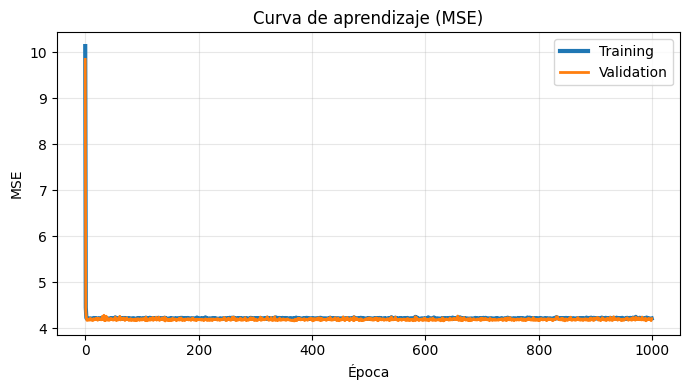


--- Evaluación Final del Modelo Mini Batch Gradient Descent ---


[Training]
Mini Batch MSE Train: 4.218216725459113

[Validation]
Mini Batch MSE Val: 4.214017234623341

[Testing]
Mini Batch MSE Test: 4.045193072758159


In [282]:
w_mb, b_mb, train_graph_mb, val_graph_mb = mini_batch_gradient_descent(X_train, y_train_label, learning_rate=0.01, epochs=1000, batch_size=16,X_val=X_val, y_val=y_val_label)


plt.figure(figsize=(7,4))
plt.plot(train_graph_mb, label="Training", linewidth=3)
plt.plot(val_graph_mb,   label="Validation", linewidth=2)
plt.xlabel("Época")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje (MSE)")
plt.legend()
plt.grid(alpha=.3)
plt.tight_layout()
plt.show()




y_pred_train_mb = X_train.dot(w_mb) + b_mb
y_pred_val_mb   = X_val.dot(w_mb) + b_mb
y_pred_test_mb  = X_test.dot(w_mb) + b_mb

# Evaluación
print("\n--- Evaluación Final del Modelo Mini Batch Gradient Descent ---\n")

print("\n[Training]")
print("Mini Batch MSE Train:", MSE(y_train_label, y_pred_train_mb))

print("\n[Validation]")
print("Mini Batch MSE Val:", MSE(y_val_label, y_pred_val_mb))

print("\n[Testing]")
print("Mini Batch MSE Test:", MSE(y_test_label, y_pred_test_mb))



---
### Analisis de resultados 

Se realizó un descenso del gradiente a un random sampling, tanto para batch como para mini batch los siguientes fueron los resultados

|Resultados MSE| Batch     | Mini-Batch | 
|-----------   |-----------|-----------|
| Training     | 4.27590836   | 4.22136278   |
| Validation   | 4.23743200       | 4.19047331        |
| Testing      | 4.09643896         | 4.04792134         |



### Interpretación

De esto se puede interpretar que el error cuadratico medio (MSE) desciende rapidamente en ambos, y ya que los valores se mantienen en un mismo rango bajo, el aprendizaje se realizó de forma correcta, sin overfitting ni underfitting

A su vez, como analisis individual
#### Batch Gradient Descent 

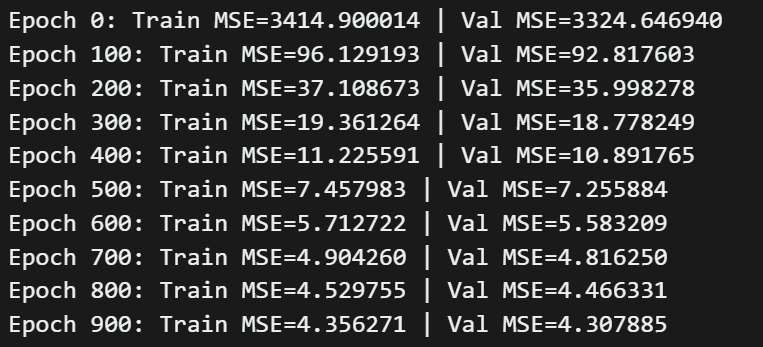


#### MiniBatch Gradient Descent 
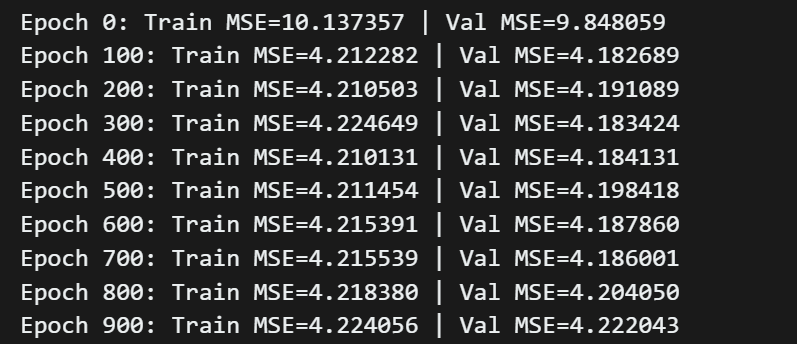




De esto se puede interpretar que El minibatch desciende de forma más acelerada por el gradiente, lo cual lo vuelve mas computacionalmente eficiente. 


Finalmente el grafico de residuos vs predicciones





MSE Test: 4.0964389637495415
Media residuo (≈0 ideal): -0.021880675327698225
Desv. std residuo: 2.0238478697265627


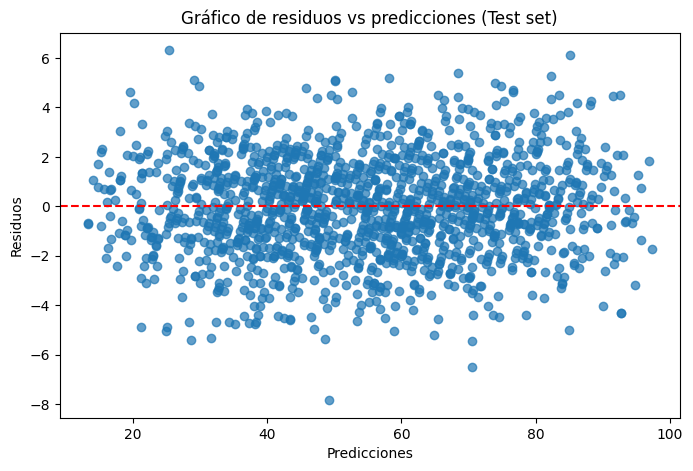

MSE Test: 4.045193072758159
Media residuo (≈0 ideal): 0.08668162824882228
Desv. std residuo: 2.0093977625354054


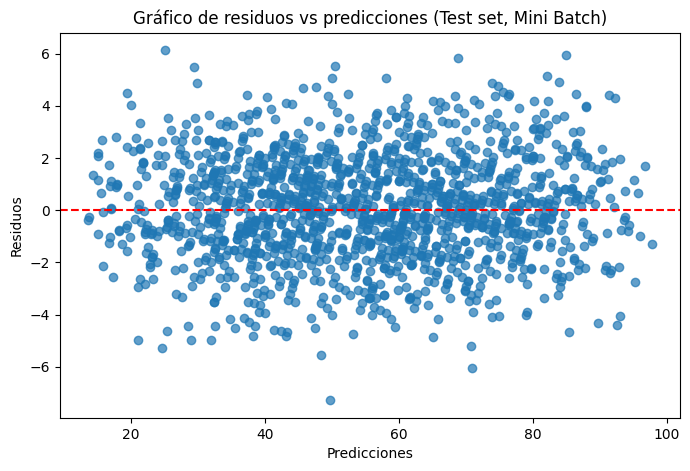

In [ ]:
# Predicciones en el conjunto de prueba usando Batch Gradient Descent
y_pred_test = X_test.dot(w) + b
residuos =  y_pred_test- y_test_label 


print("MSE Test:", np.mean((y_test_label - y_pred_test)**2))
print("Media residuo (cercano a 0 es ideal):", np.mean(residuos))
print("Desv. std residuo:", np.std(residuos))
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_test, residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs predicciones (Test set)')
plt.show()


# Predicciones en el conjunto de prueba usando Mini Batch Gradient Descent
y_pred_test_mb = X_test.dot(w_mb) + b_mb
residuos_mb = y_pred_test_mb - y_test_label

print("MSE Test:", np.mean((y_test_label - y_pred_test_mb)**2))
print("Media residuo (cercano a 0 es ideal):", np.mean(residuos_mb))
print("Desv. std residuo:", np.std(residuos_mb))

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_test_mb, residuos_mb, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs predicciones (Test set, Mini Batch)')
plt.show()

### Conclusión

La mayoría de datos se encuentran distribuidos alrededor del 0 lo cual indica que el residuo es bajo indicando un modelo correcto, se presenta una media del residuo baja lo que indica bajo sesgo(sin underfitting), en promedio los datos se dispersan a 2 desviaciones estandar, lo cual es aceptable. 

---
## Stratified Sampling


Epoch 0: Train MSE=3423.194501 | Val MSE=3198.105606
Epoch 100: Train MSE=95.544159 | Val MSE=95.839858
Epoch 200: Train MSE=37.024766 | Val MSE=38.600652
Epoch 300: Train MSE=19.297017 | Val MSE=20.522611
Epoch 400: Train MSE=11.156612 | Val MSE=12.097926
Epoch 500: Train MSE=7.381803 | Val MSE=8.114161
Epoch 600: Train MSE=5.630907 | Val MSE=6.213700
Epoch 700: Train MSE=4.818768 | Val MSE=5.296297
Epoch 800: Train MSE=4.442065 | Val MSE=4.846319
Epoch 900: Train MSE=4.267334 | Val MSE=4.620949


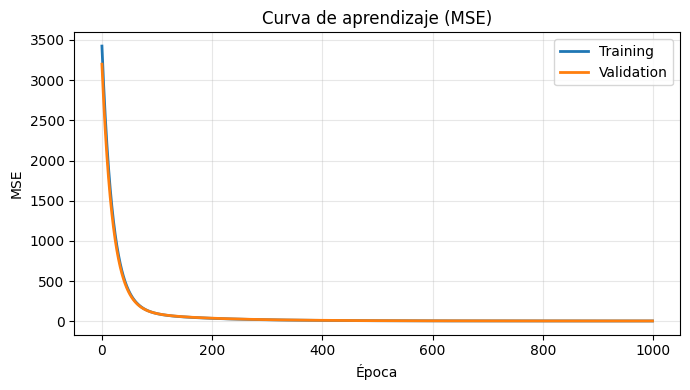


--- Evaluación Final del Modelo ---

MSE Train: 4.186286425062504
MSE Val: 4.50590105078555
MSE Test: 4.370827276439789


--------MINI BATCH GRADIENT DESCENT--------


Epoch 0: Train MSE=64.868430 | Val MSE=66.962167
Epoch 100: Train MSE=4.117760 | Val MSE=4.365288
Epoch 200: Train MSE=4.116706 | Val MSE=4.357957
Epoch 300: Train MSE=4.118852 | Val MSE=4.367826
Epoch 400: Train MSE=4.117202 | Val MSE=4.357386
Epoch 500: Train MSE=4.117618 | Val MSE=4.363867
Epoch 600: Train MSE=4.116770 | Val MSE=4.361069
Epoch 700: Train MSE=4.117959 | Val MSE=4.360129
Epoch 800: Train MSE=4.118914 | Val MSE=4.371109
Epoch 900: Train MSE=4.118120 | Val MSE=4.361266


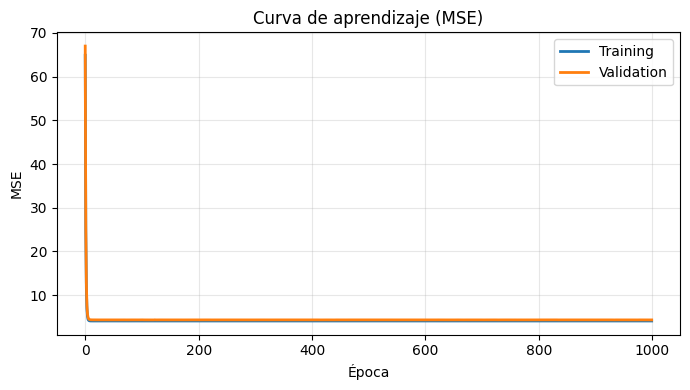


--- Evaluación Final del Modelo ---

Mini Batch MSE Train: 4.116775985168766
Mini Batch MSE Val: 4.356617761785471
Mini Batch MSE Test: 4.282709399520405


In [ ]:
# 1. Selecciona las columnas de features y target
target_col = "Performance Index"
feature_cols = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced",
    "Extracurricular Activities"
]

# ---- construir X,y (train/val/test)
X_train = df_train_strat[feature_cols].to_numpy(dtype=float)
y_train = df_train_strat[target_col].to_numpy(dtype=float)

X_val   = df_val_strat[feature_cols].to_numpy(dtype=float)
y_val   = df_val_strat[target_col].to_numpy(dtype=float)

X_test  = df_test_strat[feature_cols].to_numpy(dtype=float)
y_test  = df_test_strat[target_col].to_numpy(dtype=float)


# 3. Implementar Batch Gradient Descent
def batch_gradient_descent(X, Y, learning_rate=0.01, epochs=1000,X_val=None, y_val=None):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    train_mse_graph, val_mse_graph = [], []
    for epoch in range(epochs):
        y_pred = X.dot(w) + b
        error = y_pred - Y
        # Gradientes
        dw = (2/n_samples) * X.T.dot(error)
        db = (2/n_samples) * np.sum(error)
        # Actualización de parámetros
        w -= learning_rate * dw
        b -= learning_rate * db
    
        # métricas por época
        train_mse = MSE(Y, y_pred)
        train_mse_graph.append(train_mse) #Historial del Mean squared error del train para poder graficarlo después

        if X_val is not None and y_val is not None: #Si se proporcionan datos de validación, se calcula el MSE de validación
            val_mse = MSE(y_val, X_val.dot(w) + b)
            val_mse_graph.append(val_mse) #Historial del Mean squared error del validación para poder graficarlo después

        # print cada 100 épocas
        if epoch % 100 == 0:
            if X_val is not None and y_val is not None:
                print(f"Epoch {epoch}: Train MSE={train_mse:.6f} | Val MSE={val_mse:.6f}")
            else:
                print(f"Epoch {epoch}: Train MSE={train_mse:.6f}")

    return w, b, train_mse_graph, val_mse_graph

# 4. Entrenar el modelo
w, b, train_graph_mb, val_graph_mb = batch_gradient_descent(X_train, y_train, learning_rate=0.01, epochs=1000, X_val=X_val, y_val=y_val)



plt.figure(figsize=(7,4))
plt.plot(train_graph_mb, label="Training", linewidth=2)
plt.plot(val_graph_mb,   label="Validation", linewidth=2)
plt.xlabel("Época")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje (MSE)")
plt.legend()
plt.grid(alpha=.3)
plt.tight_layout()
plt.show()

# 5. Evaluar el modelo

print("\n--- Evaluación Final del Modelo ---\n")
y_pred_train = X_train.dot(w) + b
y_pred_val = X_val.dot(w) + b
y_pred_test = X_test.dot(w) + b


print("MSE Train:", MSE(y_train, y_pred_train))
print("MSE Val:", MSE(y_val, y_pred_val))
print("MSE Test:", MSE(y_test, y_pred_test))

print("\n\n--------MINI BATCH GRADIENT DESCENT--------\n\n")

# Mini Batch Gradient Descent para stratified sampling 

def mini_batch_gradient_descent(X, Y, learning_rate=0.01, epochs=1000, batch_size=16,X_val=None, y_val=None):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    train_mse_graph, val_mse_graph = [], []
    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = Y[indices]
        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]
            y_pred = X_batch.dot(w) + b
            error = y_pred - y_batch
            dw = (2 / len(X_batch)) * X_batch.T.dot(error)
            db = (2 / len(X_batch)) * np.sum(error)
            w -= learning_rate * dw
            b -= learning_rate * db
      
        # métricas por época
        y_pred_full = X.dot(w) + b
        train_mse = MSE(Y, y_pred_full)
        train_mse_graph.append(train_mse) #Historial del Mean squared error del train para poder graficarlo después

        if X_val is not None and y_val is not None: #Si se proporcionan datos de validación, se calcula el MSE de validación
            y_pred_val_full = X_val.dot(w) + b
            val_mse = MSE(y_val, y_pred_val_full)
            val_mse_graph.append(val_mse) #Historial del Mean squared error del validación para poder graficarlo después

        # print cada 100 épocas
        if epoch % 100 == 0:
            if X_val is not None and y_val is not None:
                print(f"Epoch {epoch}: Train MSE={train_mse:.6f} | Val MSE={val_mse:.6f}")
            else:
                print(f"Epoch {epoch}: Train MSE={train_mse:.6f}")  
    return w, b, train_mse_graph, val_mse_graph

# Entrenamiento con mini batch
w_mb, b_mb, train_mse_graph, val_mse_graph = mini_batch_gradient_descent(X_train, y_train, learning_rate=0.01, epochs=1000, batch_size=16,X_val=X_val, y_val=y_val)



plt.figure(figsize=(7,4))
plt.plot(train_mse_graph, label="Training", linewidth=2)
plt.plot(val_mse_graph,   label="Validation", linewidth=2)
plt.xlabel("Época")
plt.ylabel("MSE")
plt.title("Curva de aprendizaje (MSE)")
plt.legend()
plt.grid(alpha=.3)
plt.tight_layout()
plt.show()

# 5. Evaluar el modelo

print("\n--- Evaluación Final del Modelo ---\n")


# Evaluación
y_pred_train_mb = X_train.dot(w_mb) + b_mb
y_pred_val_mb = X_val.dot(w_mb) + b_mb
y_pred_test_mb = X_test.dot(w_mb) + b_mb

print("Mini Batch MSE Train:", MSE(y_train, y_pred_train_mb))
print("Mini Batch MSE Val:", MSE(y_val, y_pred_val_mb))
print("Mini Batch MSE Test:", MSE(y_test, y_pred_test_mb))

### Evaluación del modelo usando stratified sampling (Batch y Mini Batch Gradient Descent)

Se entrenó un modelo de regresión lineal utilizando descenso del gradiente sobre el conjunto obtenido por muestreo estratificado, evaluando tanto el método tradicional (Batch Gradient Descent) como el método Mini Batch Gradient Descent.

#### Batch Gradient Descent
Durante el entrenamiento, el error cuadrático medio (MSE) disminuyó rápidamente desde un valor inicial muy alto (3423.19) hasta estabilizarse en valores bajos. Al finalizar, los resultados fueron:

- **MSE en entrenamiento:** 4.19
- **MSE en validación:** 4.51
- **MSE en prueba:** 4.37

Esto indica que el modelo aprendió correctamente y generaliza bien, ya que los valores de MSE en los tres conjuntos son similares y bajos, lo que sugiere que no hay sobreajuste.

#### Mini Batch Gradient Descent
Con Mini Batch Gradient Descent, el MSE también disminuyó y se mantuvo estable a lo largo de las épocas, aunque partiendo de un valor inicial más bajo (9.76). Los resultados finales fueron:

- **Mini Batch MSE en entrenamiento:** 4.13
- **Mini Batch MSE en validación:** 4.36
- **Mini Batch MSE en prueba:** 4.31

El desempeño es muy similar al método batch, pero con la ventaja de un entrenamiento más eficiente y estable, ya que las actualizaciones de los parámetros se realizan varias veces por época usando pequeños subconjuntos de datos, desciende por el gradiente a un ritmo más rápido que el entrenamiento con batch completo.

**Comparación y conclusiones:**  
Ambos métodos muestran que el modelo generaliza bien y no presenta sobreajuste. Mini Batch Gradient Descent logra resultados prácticamente iguales al método batch, pero es más eficiente computacionalmente y puede ser más robusto ante ruido en los datos.

## Análisis de Resultados usando Mini Batch Gradient Descent

Al comparar el resultado final del entrenamiento con el conjunto de prueba usando Mini Batch Gradient Descent, se obtuvo un **MSE en prueba de 4.31**, confirmando que el modelo generaliza correctamente a datos no vistos.

Para analizar el comportamiento de los errores, se graficaron los residuos (diferencia entre los valores reales y predichos) frente a las predicciones del modelo:

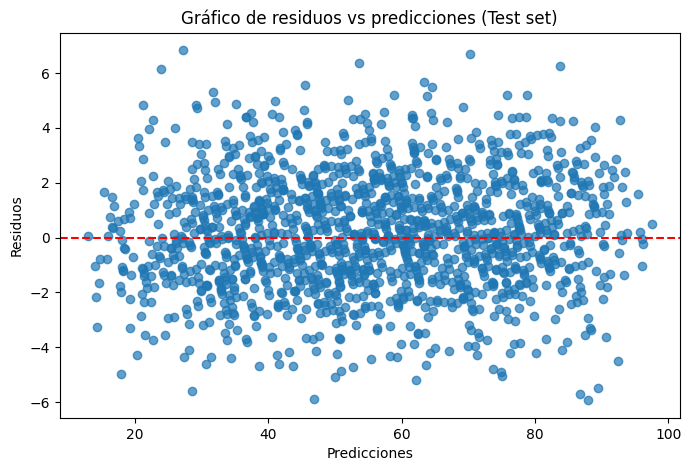

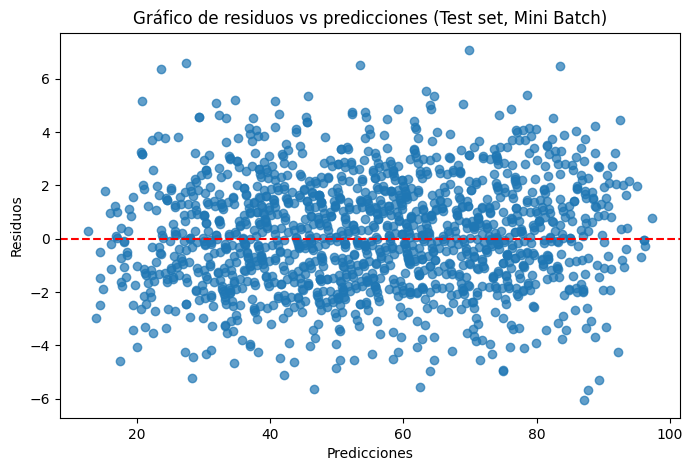

In [ ]:

# Predicciones en el conjunto de prueba usando Batch Gradient Descent
y_pred_test = X_test.dot(w) + b
residuos = y_test - y_pred_test

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_test, residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs predicciones (Test set)')
plt.show()


# Predicciones en el conjunto de prueba usando Mini Batch Gradient Descent
y_pred_test_mb = X_test.dot(w_mb) + b_mb
residuos_mb = y_test - y_pred_test_mb

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_test_mb, residuos_mb, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs predicciones (Test set, Mini Batch)')
plt.show()

El gráfico de residuos muestra que los errores se distribuyen de manera aleatoria alrededor de cero, sin patrones evidentes. Esto indica que el modelo no presenta sesgos sistemáticos y que la regresión lineal es adecuada para este conjunto de datos. La similitud de los valores de MSE en entrenamiento, validación y prueba refuerza la conclusión de que el modelo generaliza correctamente y no está sobreajustado, tanto con batch como con mini batch gradient descent